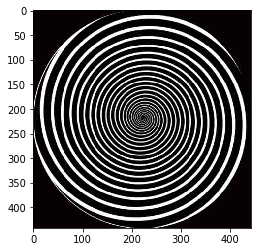

In [2]:
import skimage
import matplotlib.pyplot as plt
from skimage import io

img=io.imread('Hypnotic-spiral.jpg')
plt.imshow(img)

In [3]:
#Dimensionality reduction,Clustering and nearest neighbors of peptide reads
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('mhc_train.csv')
lines=list(df['sequence'])

In [5]:
import scipy.io

from numpy import argmax

X=[]

for i in range(0,len(lines)):
    
    data=lines[i]
    alphabet = 'ARNDCQEGHILKMFPSTWYVX'
# define a mapping of chars to integers
    char_to_int = dict((c, i) for i, c in enumerate(alphabet))
    int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
    integer_encoded = [char_to_int[char] for char in data]
    X.append(integer_encoded)

X=np.array(X)  

In [8]:
#PCA for Kmeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [11]:
#Figuring out Optimal number of clusters
from sklearn.cluster import KMeans
def kmeanscost(K):
    kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
    c=0
    m=X.shape[0]
    for i in range(0,m):
        c = c+(X[i,:]-kmeans.cluster_centers_[kmeans.labels_[i]])*((X[i,:]-kmeans.cluster_centers_[kmeans.labels_[i]]).T)
    cost = (1/float(m))*np.sum(c) 
    return (cost)

max_clusters=50
costs = []
for i in range(1,max_clusters+1):
    costs.append(kmeanscost(i))


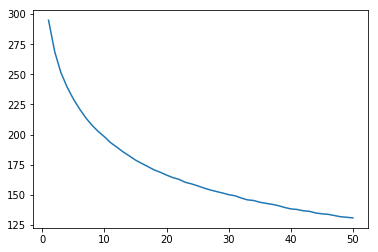

In [12]:
import matplotlib.pyplot as plt
cluster_nums = range(1,max_clusters+1)

plt.plot(cluster_nums,costs)

In [13]:
#Kmeans
kmeans = KMeans(n_clusters=50, random_state=0).fit(principalComponents)

y_kmeans=kmeans.predict(principalComponents)

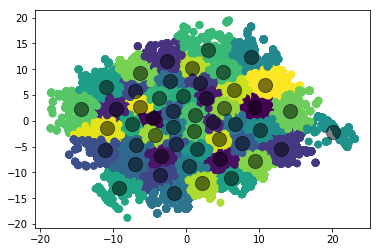

In [14]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [15]:
#Nearest neighbors

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(principalComponents)

In [16]:
distances, indices = nbrs.kneighbors(principalComponents)

In [17]:
#Sanity check
indices

array([[    0, 88260, 63558],
       [    1, 24101, 28705],
       [    2, 40548, 12450],
       ...,
       [19594, 32501, 57688],
       [83949, 73567, 90848],
       [90849, 89611, 80153]])

In [18]:
kmeans.labels_[0]

0

In [19]:
kmeans.labels_[88260]

0

In [20]:
kmeans.labels_[63558]

0